In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

In [2]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather = pd.read_sql_query('select * from weatherinszeged',con=engine)

engine.dispose()

weather.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [8]:
# Y is the target variable
Y = weather['temperature']

# X is the feature set 
X = weather[['humidity', 'windspeed', 'windbearing', 'pressure']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

predictions = lrm.predict(X)
errors = Y - predictions

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528537


In [4]:
import statsmodels.api as sm

# We need to manually add a constant
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Wed, 16 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:28:19   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Assumption one: linearity of the model in its coefficients

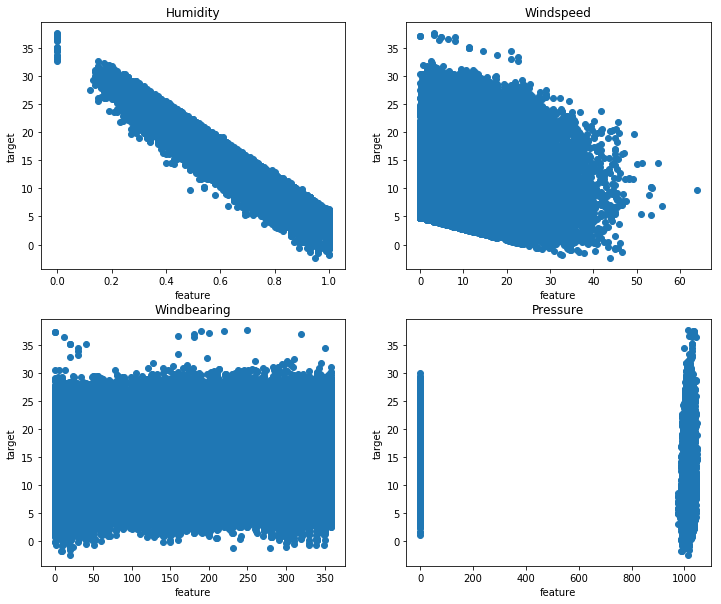

In [14]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(X['humidity'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Humidity')

plt.subplot(2, 2, 2)
plt.scatter(X['windspeed'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Windspeed')

plt.subplot(2, 2, 3)
plt.scatter(X['windbearing'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Windbearing')

plt.subplot(2, 2, 4)
plt.scatter(X['pressure'], predictions)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Pressure')

plt.show()

Windbearing and pressure do not appear correlated. They should be removed as features.

### Assumption two: the error term should be zero on average

In [15]:
print("Mean of the errors in the houseprices model is: {}".format(np.mean(errors)))

Mean of the errors in the houseprices model is: -1.9624955657832385e-15


The assumption is met as the errors are essentially zero. 

### Assumption three: homoscedasticity

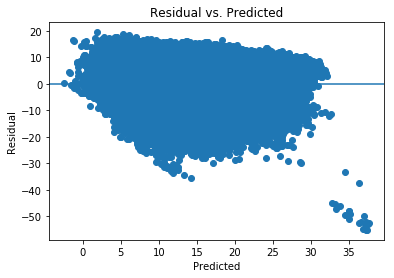

In [16]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [17]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


Both tests are greater than 0.05 so we except the null hypothesis and conclude the distribution of errors is homoscedastic. 

### Assumption four: low multicollinearity

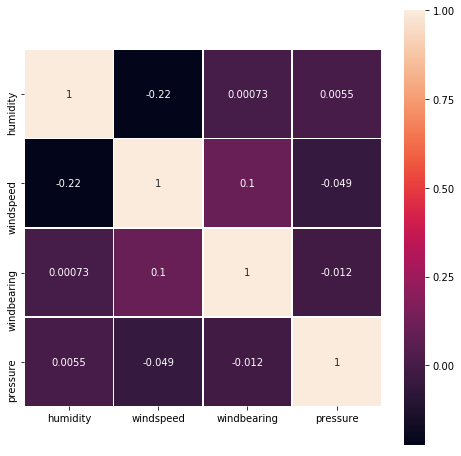

In [18]:
cor_map = X.corr()
fig, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(cor_map, square=True, annot=True, linewidths=.5, ax = ax)

None of the features appear to be correlated with each other so this assumption is met.

### Assumption five: error terms should be uncorrelated with one another

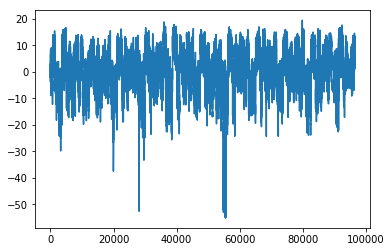

In [19]:
plt.plot(errors)
plt.show()

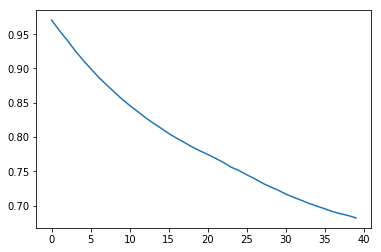

In [20]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

The error terms do appear to be highly correlated with one another at a level between 0.95 to 0.70. There is likely an important variable that has been left out. 

### Assumption six: features shouldn't be correlated with the errors

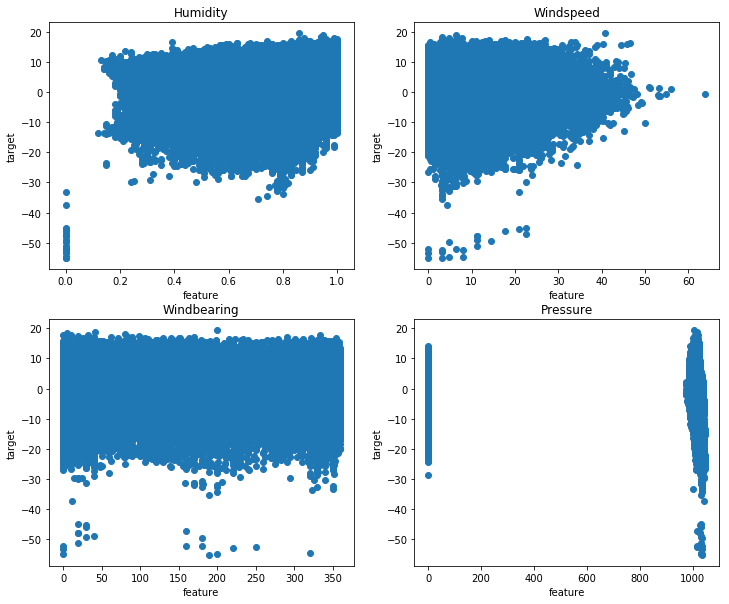

In [21]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(X['humidity'], errors)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Humidity')

plt.subplot(2, 2, 2)
plt.scatter(X['windspeed'], errors)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Windspeed')

plt.subplot(2, 2, 3)
plt.scatter(X['windbearing'], errors)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Windbearing')

plt.subplot(2, 2, 4)
plt.scatter(X['pressure'], errors)
plt.xlabel("feature")
plt.ylabel("target")
plt.title('Pressure')

plt.show()

None of the features seem to be correlated with the errors so this assumption is met. 